<a href="https://colab.research.google.com/github/Nafisa-Tasneem/ML_Learning/blob/main/ham10000_dataset_project_for_skin_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## importing all necessary files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
# from PIL import Image
import PIL.Image 

In [3]:
from keras.preprocessing.image import ImageDataGenerator
# import os
# from matplotlib import pyplot as plt


In [4]:
#mounting google drive to colab
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [5]:
# print(os.getcwd)
# data_dir = os.getcwd()
# print(data_dir)

In [6]:
train_dir = "/content/gdrive/MyDrive/ham10000/reorganized"

In [7]:
#Define datagen. Here we can define any transformations we want to apply to images
datagen = ImageDataGenerator()

In [8]:
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

Found 10017 images belonging to 7 classes.


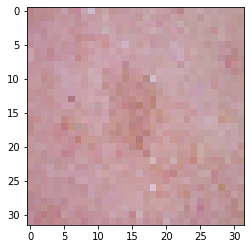

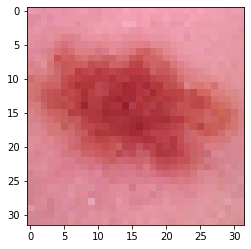

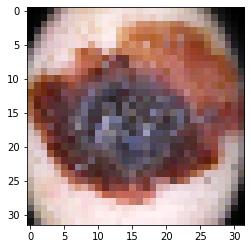

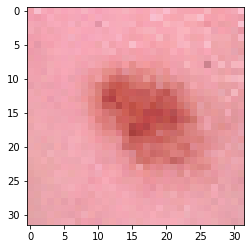

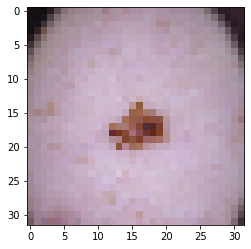

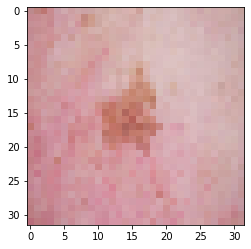

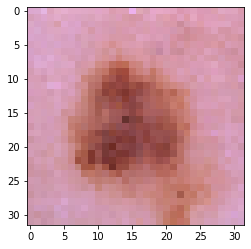

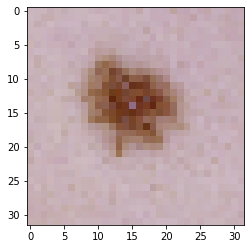

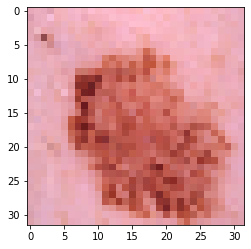

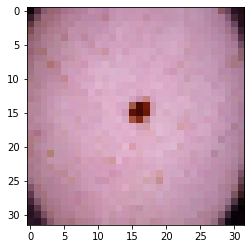

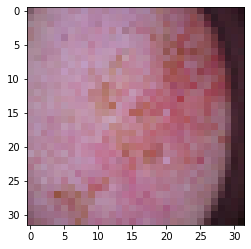

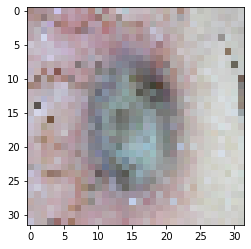

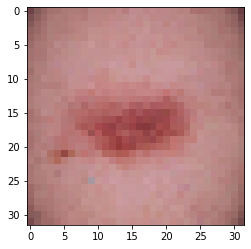

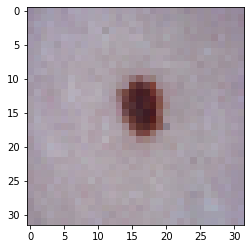

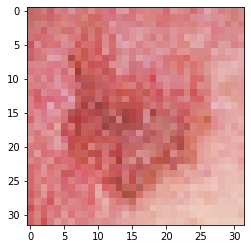

In [9]:
#We can check images for a single batch.
x, y = next(train_data_keras)
#View each image
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()

In [10]:
import seaborn as sns
from PIL import Image

np.random.seed(42)
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
# import autokeras as ak

In [11]:
#reading the metadata

In [12]:
skin_df = pd.read_csv('/content/gdrive/MyDrive/ham10000/HAM10000_metadata.csv')
SIZE = 32 #pixel size

##converting labels into 0 1 2 3 4 
## transforming the labels into numerical values
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))
 
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


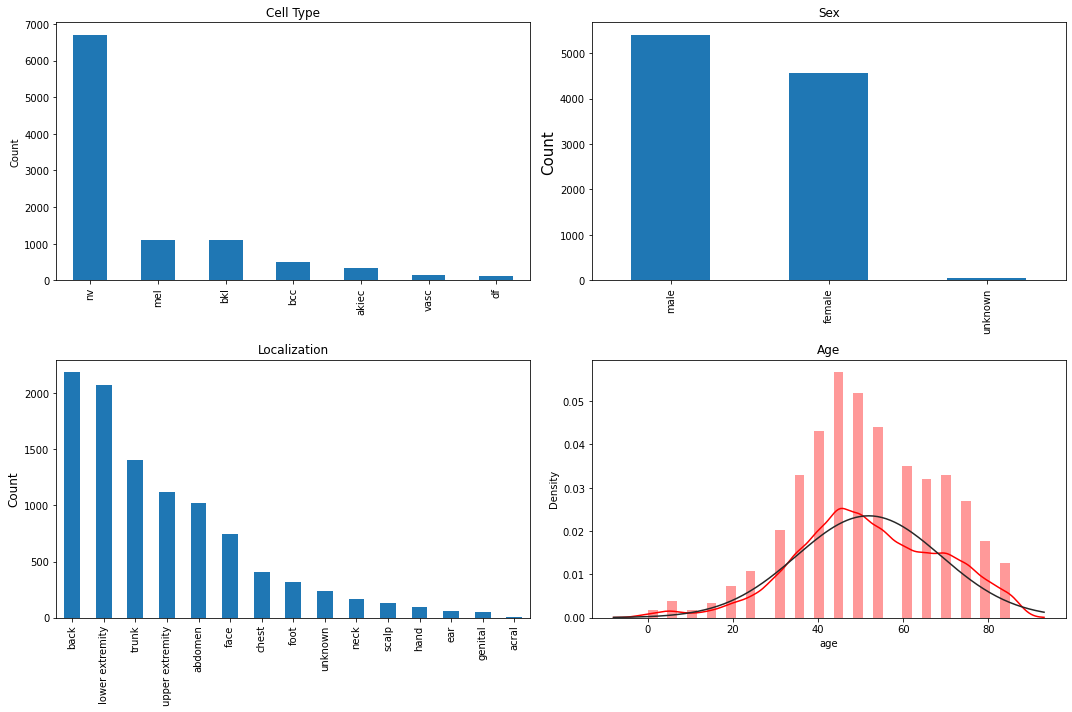

In [13]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10)) 

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()


In [14]:
 #distribution of data into various classes
from sklearn.utils import resample
print(skin_df['label'].value_counts())
# using value_counts() to see how many images are of each type

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [15]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [16]:
n_samples=500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [17]:
print(skin_df_balanced['label'].value_counts())
#showing the number of data in each class after resample

0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


In [18]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/content/gdrive/MyDrive/ham10000/reorganized/', '*', '*.jpg'))}
# #Define the path and add as a new column
# skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
# #Use the path to read images.
# skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


In [19]:
# Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)


Without loading the images in numpy array, we could also load image by using image data generator method. 
 For each of the image, open the image, resize it to 32 by 32, convert it to numpy array, and add it into a new column called image. it tooks time as we are loading 3500 images, resizing it to 32 by 32

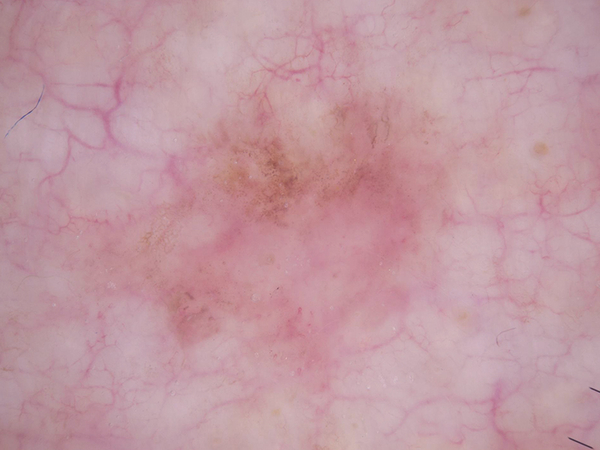

In [20]:
Image.open(skin_df_balanced['path'][500], mode = 'r')
# print(skin_df_balanced['path'][500])
# print(skin_df_balanced['path'])

In [21]:
skin_df_balanced.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,/content/gdrive/MyDrive/ham10000/reorganized/a...
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,/content/gdrive/MyDrive/ham10000/reorganized/a...
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,/content/gdrive/MyDrive/ham10000/reorganized/a...
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,/content/gdrive/MyDrive/ham10000/reorganized/a...
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,/content/gdrive/MyDrive/ham10000/reorganized/a...


In [22]:
skin_df_balanced['image_array']=skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))

It is important to check if there is all images in the sub folders. If there is missing image, then it will show 'NoneType object has no attribute to seek'

In [28]:
skin_df_balanced.sample(15)

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image_array
2379,HAM_0001852,ISIC_0033749,vasc,histo,80.0,male,lower extremity,6,/content/gdrive/MyDrive/ham10000/reorganized/v...,"[[[135, 114, 124], [162, 141, 150], [177, 155,..."
9919,HAM_0006442,ISIC_0033000,akiec,histo,70.0,male,hand,0,/content/gdrive/MyDrive/ham10000/reorganized/a...,"[[[174, 145, 156], [175, 146, 156], [178, 152,..."
2347,HAM_0007614,ISIC_0027672,vasc,histo,55.0,female,face,6,/content/gdrive/MyDrive/ham10000/reorganized/v...,"[[[219, 192, 212], [219, 193, 213], [219, 196,..."
2387,HAM_0004820,ISIC_0030722,vasc,consensus,45.0,female,abdomen,6,/content/gdrive/MyDrive/ham10000/reorganized/v...,"[[[241, 215, 226], [241, 214, 224], [238, 212,..."
1153,HAM_0007418,ISIC_0026313,df,consensus,50.0,male,lower extremity,3,/content/gdrive/MyDrive/ham10000/reorganized/d...,"[[[151, 105, 102], [166, 123, 123], [177, 139,..."
704,HAM_0004630,ISIC_0028376,bkl,histo,85.0,male,face,2,/content/gdrive/MyDrive/ham10000/reorganized/b...,"[[[158, 135, 144], [163, 142, 150], [166, 143,..."
90,HAM_0002921,ISIC_0029308,bkl,histo,60.0,female,face,2,/content/gdrive/MyDrive/ham10000/reorganized/b...,"[[[29, 15, 25], [30, 16, 26], [27, 14, 23], [3..."
955,HAM_0000332,ISIC_0033784,bkl,consensus,80.0,female,upper extremity,2,/content/gdrive/MyDrive/ham10000/reorganized/b...,"[[[71, 52, 59], [125, 88, 97], [158, 106, 118]..."
9730,HAM_0006222,ISIC_0025069,akiec,histo,75.0,male,upper extremity,0,/content/gdrive/MyDrive/ham10000/reorganized/a...,"[[[219, 189, 193], [221, 196, 206], [222, 197,..."
8843,HAM_0006685,ISIC_0025542,nv,histo,20.0,female,scalp,5,/content/gdrive/MyDrive/ham10000/reorganized/n...,"[[[130, 101, 90], [142, 113, 108], [148, 115, ..."


In [24]:
from numpy import asarray

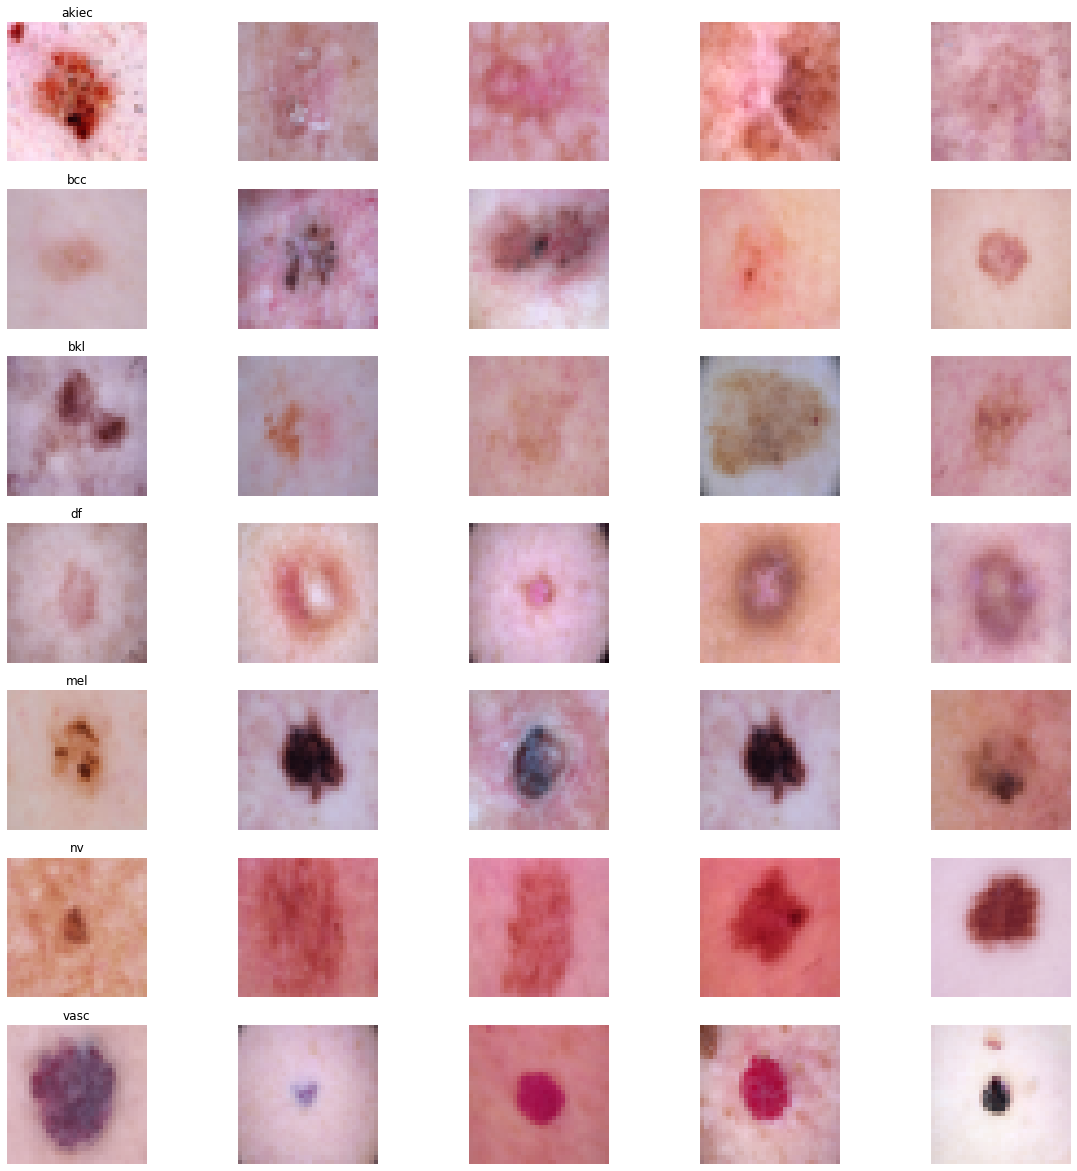

In [25]:
n_samples = 5  

# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image_array'])
        c_ax.axis('off')

In [26]:
#convert dataframe colmn of images into numpy array
X = np.asarray(skin_df_balanced['image_array'].tolist())


In [27]:
X = X/255. #scale values to 0-1. 

In [29]:
Y = skin_df_balanced['label'] #assign label values to Y

In [31]:
Y_cat = to_categorical(Y, num_classes=7) #convert to categorical as this is multiclass classification
#for deep learning, we need to convert this to categorical values

In [32]:
#spiltting training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25,random_state=42 )

In [33]:
x_train.shape

(2625, 32, 32, 3)

## Define the model

In [41]:
from tensorflow.keras import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [34]:
num_classes = 7

**Random State**

random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [42]:
model = Sequential()
model.add(Conv2D(256, (3,3), activation = "relu", input_shape = (SIZE, SIZE, 3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation = 'softmax'))
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['acc'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)        

## Training the model

In [43]:
batch_size = 16
epochs = 50

history = model.fit(
    x_train, y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_data = (x_test, y_test),
    verbose = 2)

Epoch 1/50
165/165 - 13s - loss: 1.9160 - acc: 0.1821 - val_loss: 1.8360 - val_acc: 0.2469 - 13s/epoch - 82ms/step
Epoch 2/50
165/165 - 2s - loss: 1.7815 - acc: 0.2632 - val_loss: 1.7900 - val_acc: 0.3040 - 2s/epoch - 10ms/step
Epoch 3/50
165/165 - 2s - loss: 1.6266 - acc: 0.3261 - val_loss: 1.5317 - val_acc: 0.3669 - 2s/epoch - 11ms/step
Epoch 4/50
165/165 - 2s - loss: 1.5141 - acc: 0.3874 - val_loss: 1.4626 - val_acc: 0.3794 - 2s/epoch - 11ms/step
Epoch 5/50
165/165 - 2s - loss: 1.4293 - acc: 0.4236 - val_loss: 1.4280 - val_acc: 0.4057 - 2s/epoch - 11ms/step
Epoch 6/50
165/165 - 2s - loss: 1.3786 - acc: 0.4564 - val_loss: 1.3932 - val_acc: 0.4400 - 2s/epoch - 11ms/step
Epoch 7/50
165/165 - 2s - loss: 1.3213 - acc: 0.4750 - val_loss: 1.4245 - val_acc: 0.4069 - 2s/epoch - 11ms/step
Epoch 8/50
165/165 - 2s - loss: 1.3062 - acc: 0.4850 - val_loss: 1.2755 - val_acc: 0.5234 - 2s/epoch - 11ms/step
Epoch 9/50
165/165 - 2s - loss: 1.2485 - acc: 0.5139 - val_loss: 1.2227 - val_acc: 0.5223 - 2s

**Verbose**

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

[====================]

verbose=2 will just mention the number of epoch like this:

Epoch 1/10


28/28 [==============================] - 0s 9ms/step - loss: 0.7764 - acc: 0.7394
Test accuracy: 0.7394285798072815


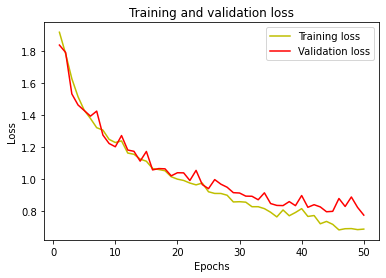

In [47]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

#plot the training and validation accuracy and loss at each epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

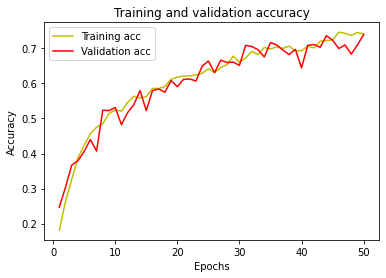

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Predict on test data

In [48]:
y_pred = model.predict(x_test)

#argmax tells in which column, there is the maxmimum value
y_pred_classes = np.argmax(y_pred, axis =1)
#convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

In [50]:
from sklearn.metrics import confusion_matrix

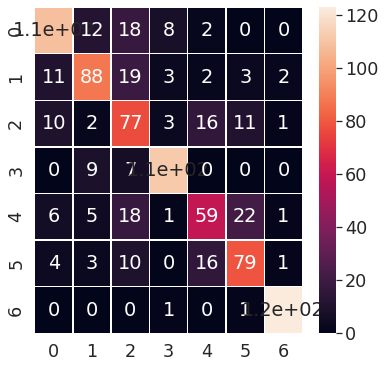

In [52]:
#print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize = (6,6))
sns.set(font_scale = 1.6)
sns.heatmap(cm, annot = True, linewidth = 0.5, ax = ax)




Text(0, 0.5, 'Fraction of incorrect predicitons')

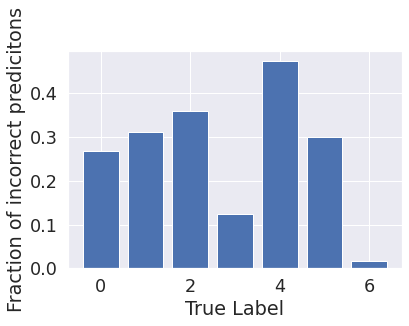

In [53]:
#plot fractional incorrect misclassification

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis = 1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predicitons')